In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [7]:
df = pd.read_csv(r"H:\Data_Science_internship\Assignments-Internship\Tittanic survival prediction\tested.csv")

### The Titanic data

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
df.shape

(418, 12)

In [11]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

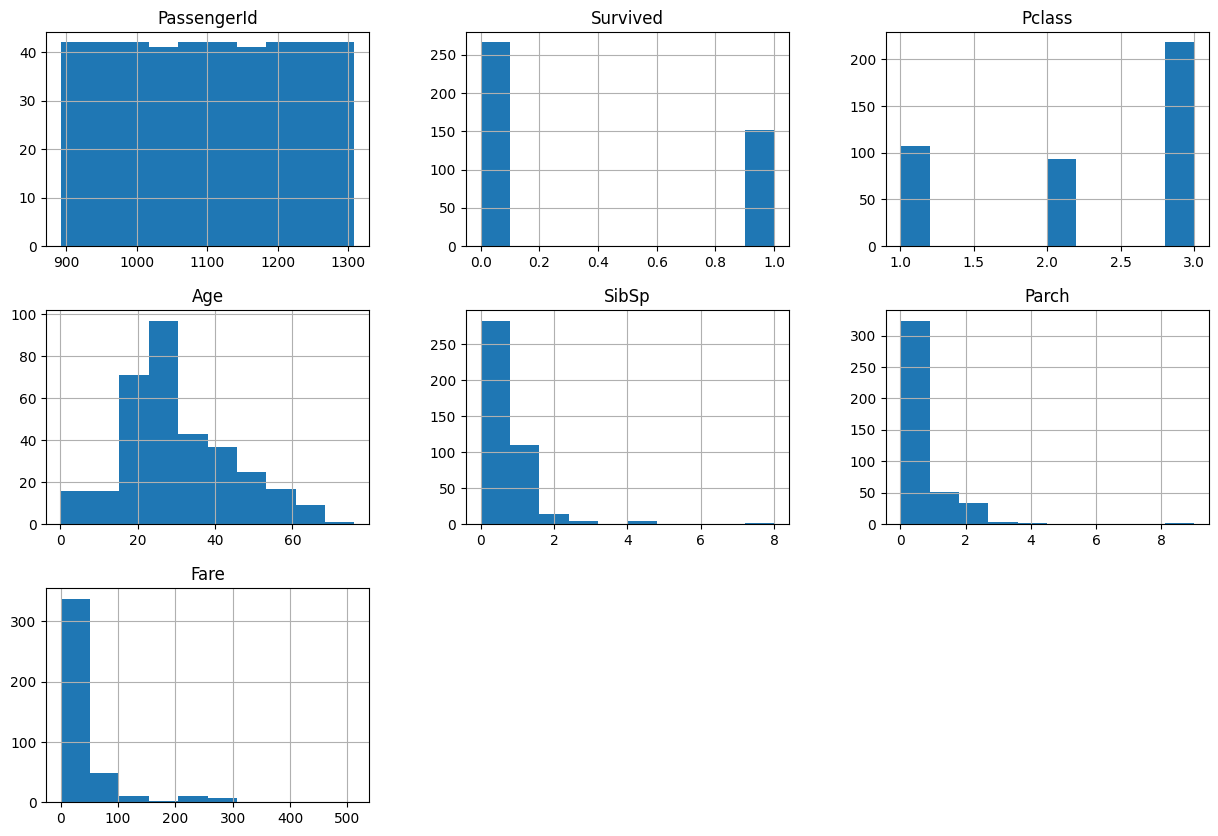

In [12]:
df.hist(figsize = (15,10))
plt.show()

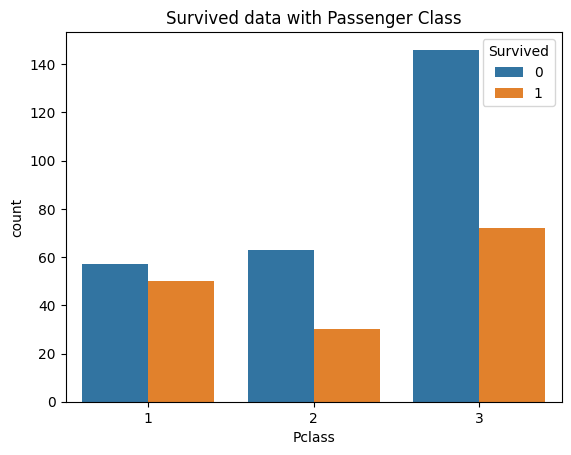

In [13]:
sb.countplot(x="Pclass",data=df,hue="Survived")
plt.title("Survived data with Passenger Class")
plt.show()

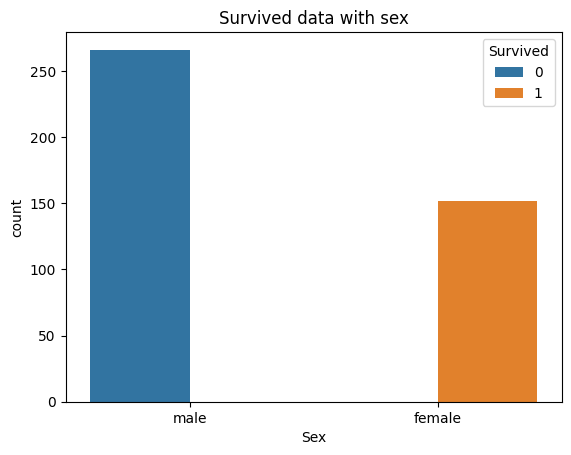

In [14]:
sb.countplot(x="Sex",data=df,hue="Survived")
plt.title("Survived data with sex")
plt.show()

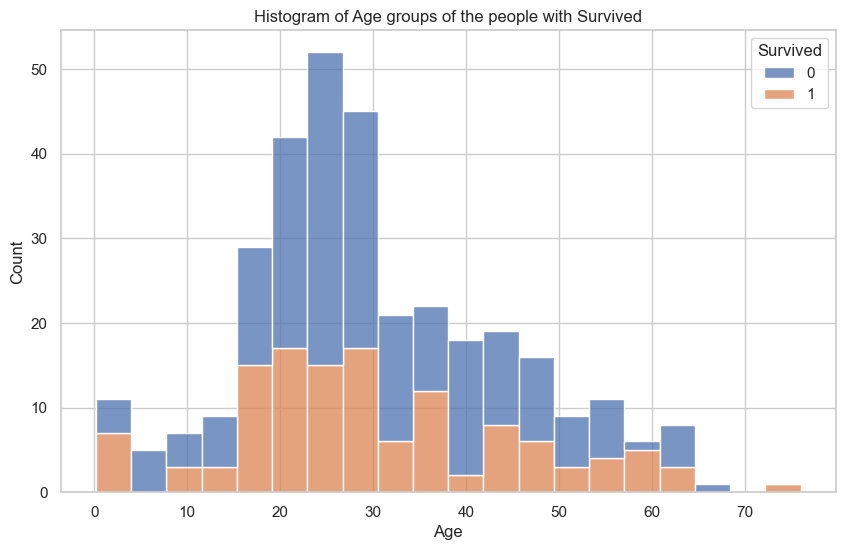

In [15]:
sb.set(style="whitegrid")
# Create a bar plot
plt.figure(figsize=(10, 6))
sb.histplot(data=df, x="Age", hue="Survived", multiple="stack", bins=20)

# Adding labels and title
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Histogram of Age groups of the people with Survived")
plt.show()

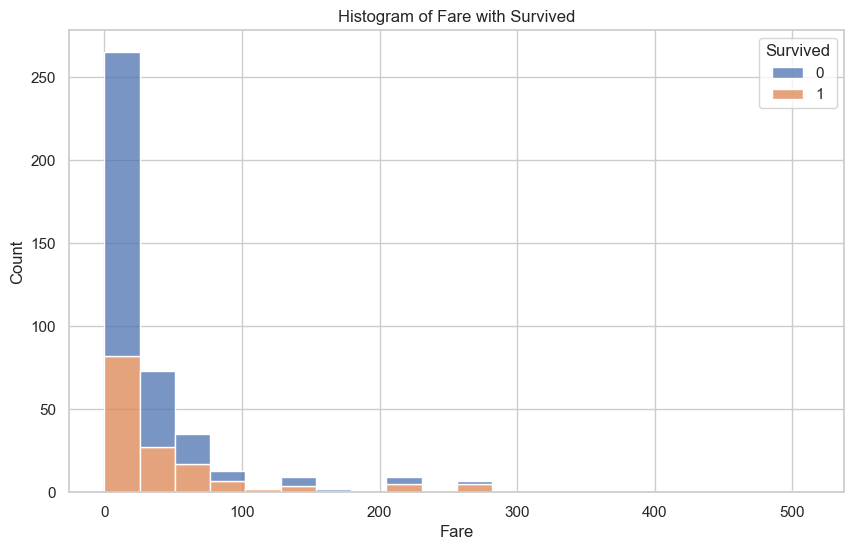

In [16]:
sb.set(style="whitegrid")
# Create a bar plot
plt.figure(figsize=(10, 6))
sb.histplot(data=df, x="Fare", hue="Survived", multiple="stack", bins=20)

# Adding labels and title
plt.xlabel("Fare")
plt.ylabel("Count")
plt.title("Histogram of Fare with Survived")
plt.show()

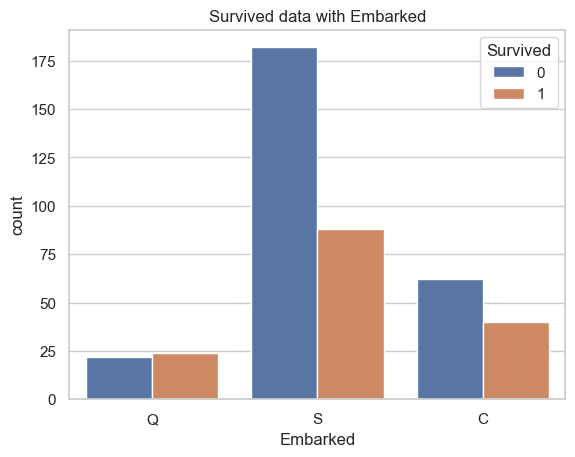

In [17]:
sb.countplot(x="Embarked",data=df,hue="Survived")
plt.title("Survived data with Embarked")
plt.show()

In [94]:
#Data Dependancy with Survival data

In [18]:
#SibSp[Number of Siblings/Spouses Aboard] with Survived
df[["SibSp","Survived"]].groupby(["SibSp"],as_index = False).mean().sort_values(by='Survived', ascending=True)

,SibSp,Survived
3,3,0.250000
4,4,0.250000
0,0,0.310954
2,2,0.428571
1,1,0.490909
6,8,0.500000
5,5,1.000000


In [19]:
#parch [Number of Parents/Children Aboard] with Survived 
df[["Parch","Survived"]].groupby(["Parch"],as_index = False).mean().sort_values(by='Survived', ascending=True)

,Parch,Survived
5,5,0.000000
6,6,0.000000
0,0,0.305556
7,9,0.500000
1,1,0.538462
2,2,0.606061
3,3,0.666667
4,4,1.000000


In [20]:
#Embarked with Survived
df[["Embarked","Survived"]].groupby(["Embarked"],as_index = False).mean().sort_values(by='Survived', ascending=True)

,Embarked,Survived
2,S,0.325926
0,C,0.392157
1,Q,0.521739


In [21]:
# Passenger Class with Survived 
df[["Pclass","Survived"]].groupby(["Pclass"],as_index = False).mean().sort_values(by='Survived', ascending=True)

,Pclass,Survived
1,2,0.322581
2,3,0.330275
0,1,0.467290


In [22]:
df.isna().any() #check if there is present of any null value or not

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [23]:
#To figure out which column have how many null values 
null_count = df.isnull().sum() 
null_persentage =  null_count*(100/418)  
df_null = pd.DataFrame({"Null values ":null_count, "Null value in persentage":null_persentage})
df_null

,Null values,Null value in persentage
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,86,20.574163
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,1,0.239234


In [24]:
#so as we see "Cabin" column have the 327 null value which is 78.22 % of the data. so we have to drop the column
df = df.drop(columns = "Cabin",axis = 1)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q


In [25]:
#The column "age" have 86 null values.
#so, fill the value with median of the existing value
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Age"].isnull().sum()

0

In [26]:
df = df.drop(columns = "PassengerId",axis = 1)
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q


In [27]:
df = df.drop(columns = "Name",axis = 1)
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,34.5,0,0,330911,7.8292,Q
1,1,3,female,47.0,1,0,363272,7.0000,S
2,0,2,male,62.0,0,0,240276,9.6875,Q


In [28]:
df = df.drop(columns = "Ticket",axis = 1)
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q


In [29]:
df.isnull().any() # so we see that there is no nulll values in Data Frame

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare         True
Embarked    False
dtype: bool

In [30]:
df = df.dropna()

In [31]:
df.shape

(417, 8)

In [121]:
# df.isnull().any()

In [33]:
#lebeling the data 
# df["Sex"] = df["Sex"].map({"female":0,"male":1})
# df["Embarked"] = df["Embarked"].map({"S":1,"C":2,"Q":3})
lb = LabelEncoder()
df.loc[:,"Sex"] = lb.fit_transform(df.loc[:,"Sex"].values)
df.loc[:,"Embarked"] = lb.fit_transform(df.loc[:,"Embarked"].values)

In [34]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2


In [35]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [36]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [37]:
X = df.iloc[:,1:8]
X.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1


In [38]:
Y = df["Survived"]
Y.head(3)

0    0
1    1
2    0
Name: Survived, dtype: int64

In [39]:
print("shape of X :",X.shape)
print("shape of Y :",Y.shape)

shape of X : (417, 7)
shape of Y : (417,)


### Train Test split

In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state =7)

In [41]:
print("Total sample in x_train : ",len(X_train),"\nTotal sample in x_test : ",len(X_test),"\nTotal sample of y_train : ",len(Y_train),"\nTotal sample of y_test : ",len(Y_test))

Total sample in x_train :  291 
Total sample in x_test :  126 
Total sample of y_train :  291 
Total sample of y_test :  126


### Logistic Regression

In [42]:
def Logistic_Regression(X_train,X_test,Y_train,Y_test):
    model1 = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=7)
    model1.fit(X_train,Y_train)
    Y_pred = model1.predict(X_test)
    acc1 = accuracy_score(Y_test,Y_pred)*100
    return acc1

In [43]:
lg = Logistic_Regression(X_train,X_test,Y_train,Y_test)
lg

100.0

### Support Vector

In [207]:
from sklearn.svm import SVC
def Support_vector(X_train,X_test,Y_train,Y_test):
    model2 = SVC(random_state=7)
    model2.fit(X_train,Y_train)
    Y_pred2 = model2.predict(X_test)
    from sklearn.metrics import accuracy_score
    svmac = accuracy_score(Y_test,Y_pred2)*100
    return svmac

In [208]:
sv = Support_vector(X_train,X_test,Y_train,Y_test)
sv

65.87301587301587

### KNN Classifier

In [211]:
from sklearn.neighbors import KNeighborsClassifier
def KNN_Classifier(X_train,X_test,Y_train,Y_test):
    model3 = KNeighborsClassifier(n_neighbors = 5)
    model3.fit(X_train,Y_train)
    Y_pred3 = model3.predict(X_test)
    from sklearn.metrics import accuracy_score
    knnac = accuracy_score(Y_test,Y_pred3)*100
    return knnac

In [212]:
knn = KNN_Classifier(X_train,X_test,Y_train,Y_test)
knn

72.22222222222221

### Naive bayes

In [215]:
from sklearn.naive_bayes import GaussianNB
def Gussian_Naive_bayes(X_train,X_test,Y_train,Y_test):
    model4 = GaussianNB()
    model4.fit(X_train,Y_train)
    Y_pred4 = model4.predict(X_test)
    from sklearn.metrics import accuracy_score
    nbac = accuracy_score(Y_test,Y_pred4)*100
    return nbac

In [216]:
gnb = Gussian_Naive_bayes(X_train,X_test,Y_train,Y_test)
gnb

100.0

### Decision Tree

In [217]:
from sklearn.tree import DecisionTreeClassifier
def Decision_Tree(X_train,X_test,Y_train,Y_test):
    model5 = DecisionTreeClassifier(criterion = "entropy",random_state=7)
    model5.fit(X_train,Y_train)
    Y_pred5 = model5.predict(X_test)
    from sklearn.metrics import accuracy_score
    dtac = accuracy_score(Y_test,Y_pred5)*100
    return dtac

In [218]:
dt = Decision_Tree(X_train,X_test,Y_train,Y_test)
dt

100.0

In [219]:
results = pd.DataFrame({"Model":["Logistic_Regression","Support_vector","KNN_Classifier","Gussian_Naive_bayes","Decision_Tree"],"Accuracy":[lg,sv,knn,gnb,dt]})
results

,Model,Accuracy
0,Logistic_Regression,100.000000
1,Support_vector,65.873016
2,KNN_Classifier,72.222222
3,Gussian_Naive_bayes,100.000000
4,Decision_Tree,100.000000
